## 0. Importing libraries and reading dataset

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

**Loading Dataset**

In [ ]:
data = pd.read_excel('bill_dataset.xlsx')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [ ]:
data.head()

,Contract Demand(KVA),85% contract Demand,Actual Demand(KVA),Total Power Consumption (KWH),Total Amount Payable
Month,,,,,
2019-01-01,3990,3392,4200,1596350,13053484.98
2019-02-01,3990,3392,3950,1511600,13016008.56
2019-03-01,3990,3392,4250,1866850,15363012.15
2019-04-01,3990,3392,4250,1714400,14270331.58
2019-05-01,5500,4675,4150,1775940,14270331.58


## 1. Visualizations for Time Series Data

 **Line Plot for Total Power Consumption and Actual Demand**

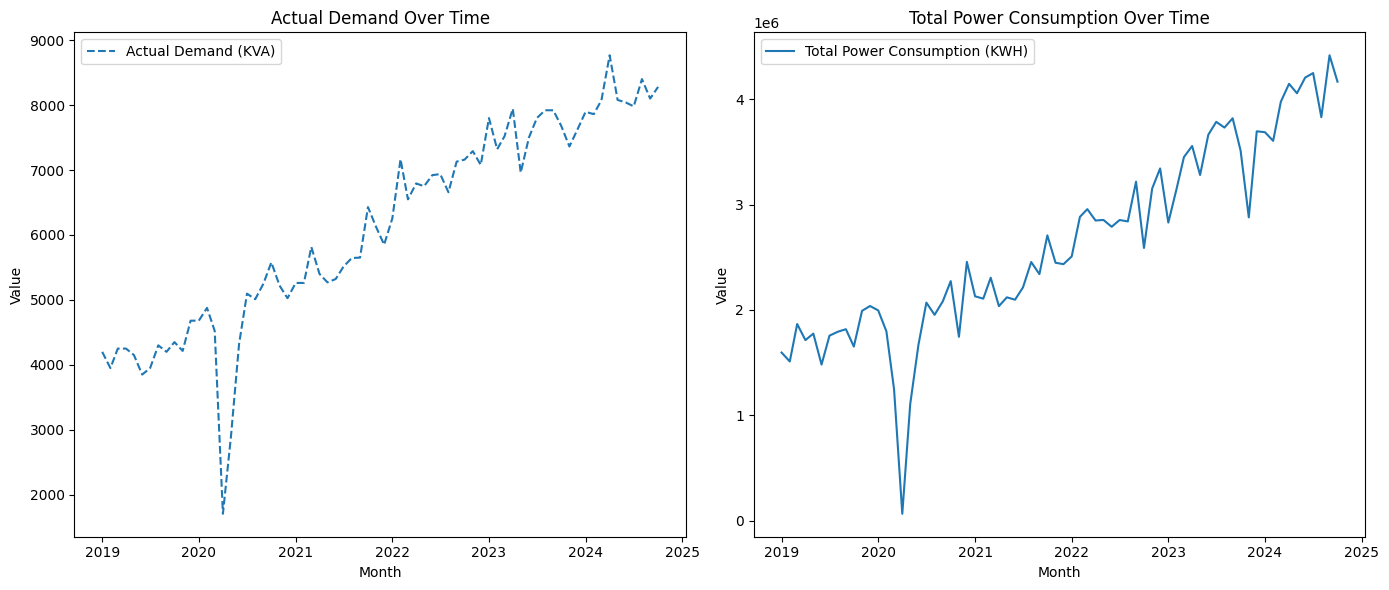

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(data.index, data['Actual Demand(KVA)'], label='Actual Demand (KVA)', linestyle='--')
plt.title('Actual Demand Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(data.index, data['Total Power Consumption (KWH)'], label='Total Power Consumption (KWH)')
plt.title('Total Power Consumption Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


**Seasonal Decomposition of Total Power Consumption**

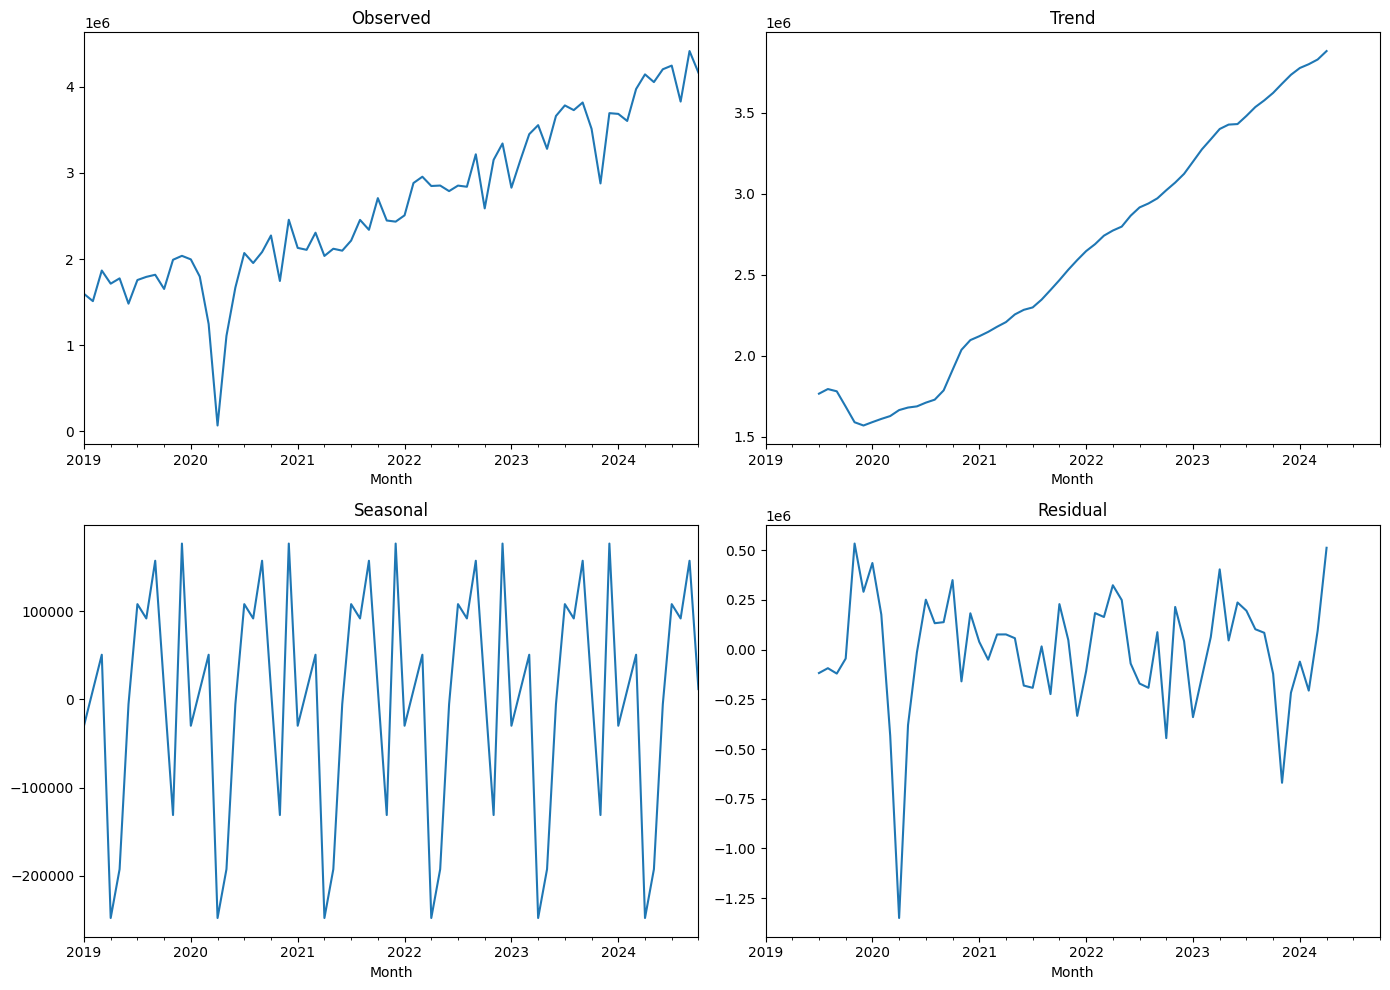

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['Total Power Consumption (KWH)'], model='additive', period=12)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

decomposition.observed.plot(ax=axes[0, 0], title='Observed')
decomposition.trend.plot(ax=axes[0, 1], title='Trend')
decomposition.seasonal.plot(ax=axes[1, 0], title='Seasonal')
decomposition.resid.plot(ax=axes[1, 1], title='Residual')

plt.tight_layout()
plt.show()


**Histogram of Monthly Consumption Differences**

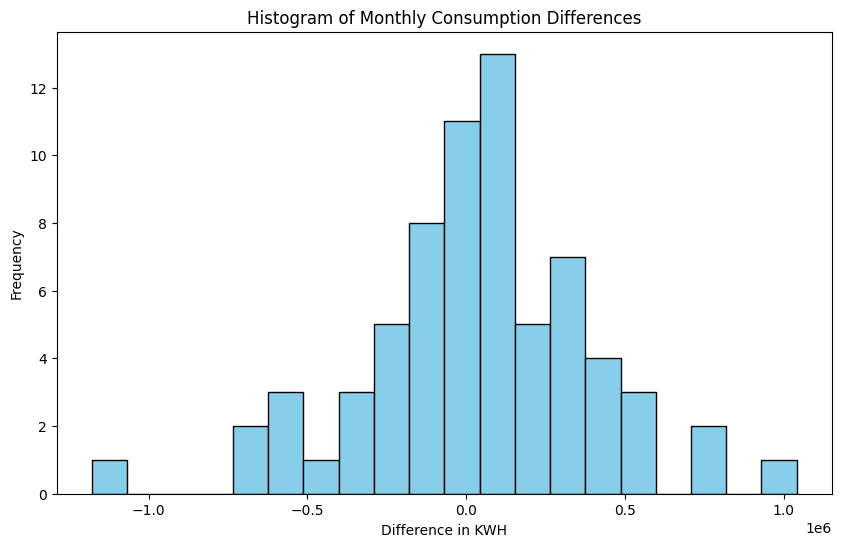

In [ ]:
data['Monthly Change'] = data['Total Power Consumption (KWH)'].diff()

plt.figure(figsize=(10, 6))
plt.hist(data['Monthly Change'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Consumption Differences')
plt.xlabel('Difference in KWH')
plt.ylabel('Frequency')
plt.show()


**Correlation Heatmap**

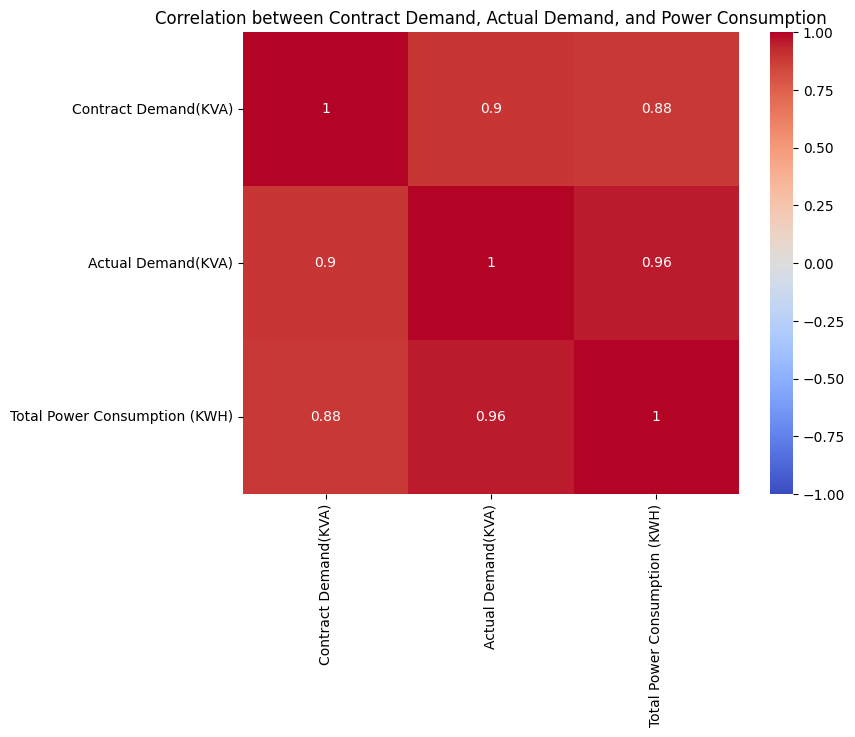

In [ ]:
correlation_data = data[['Contract Demand(KVA)', 'Actual Demand(KVA)', 'Total Power Consumption (KWH)']]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Contract Demand, Actual Demand, and Power Consumption')
plt.show()


## 2. Performing Statistical Methods

**Simple Moving Average (SMA)**

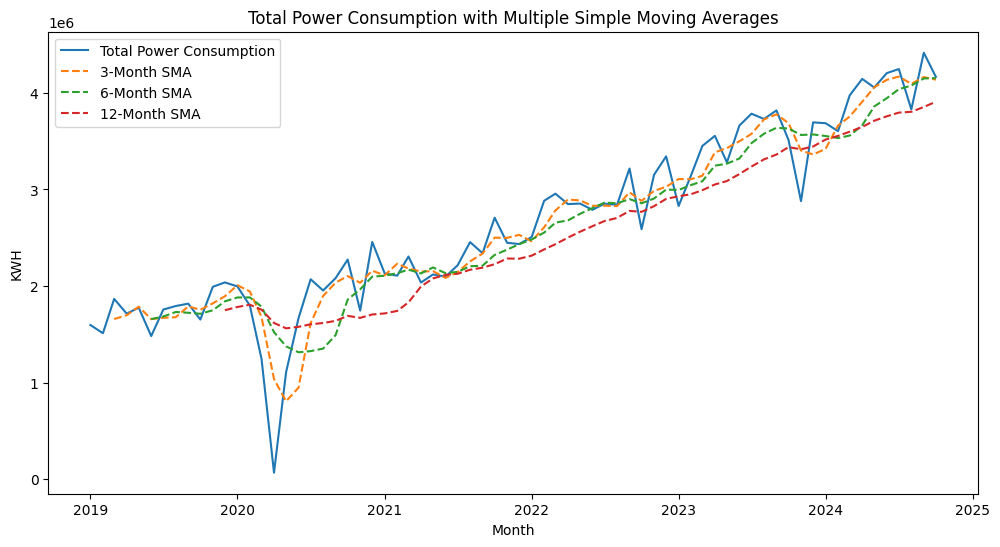

In [ ]:
data['SMA_3'] = data['Total Power Consumption (KWH)'].rolling(window=3).mean()
data['SMA_6'] = data['Total Power Consumption (KWH)'].rolling(window=6).mean()
data['SMA_12'] = data['Total Power Consumption (KWH)'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Power Consumption (KWH)'], label='Total Power Consumption')
plt.plot(data.index, data['SMA_3'], label='3-Month SMA', linestyle='--')
plt.plot(data.index, data['SMA_6'], label='6-Month SMA', linestyle='--')
plt.plot(data.index, data['SMA_12'], label='12-Month SMA', linestyle='--')

plt.title('Total Power Consumption with Multiple Simple Moving Averages')
plt.xlabel('Month')
plt.ylabel('KWH')
plt.legend()
plt.show()

**Semi-Moving Average**

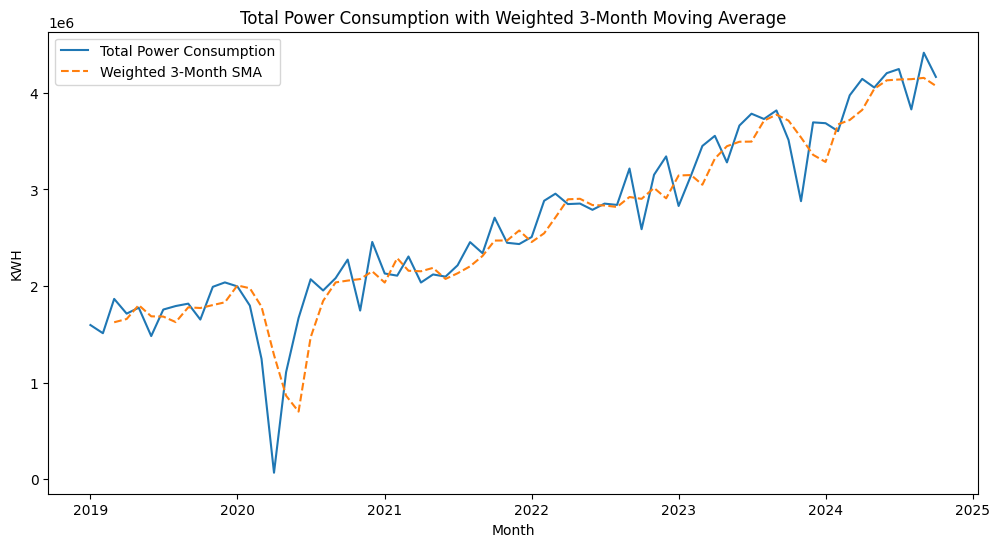

In [ ]:
weights = [0.5, 0.3, 0.2]
data['Weighted_SMA'] = data['Total Power Consumption (KWH)'].rolling(window=3).apply(lambda x: sum(weights * x))

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Power Consumption (KWH)'], label='Total Power Consumption')
plt.plot(data.index, data['Weighted_SMA'], label='Weighted 3-Month SMA', linestyle='--')
plt.title('Total Power Consumption with Weighted 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('KWH')
plt.legend()
plt.show()


**Ratio-to-Trend Analysis**

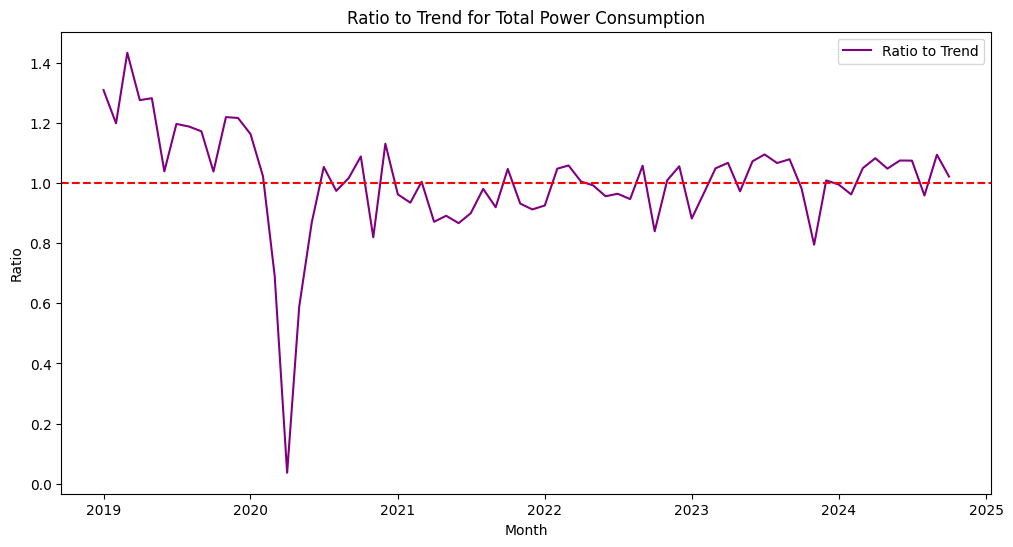

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

time = np.arange(len(data)).reshape(-1, 1)
model = LinearRegression()
model.fit(time, data['Total Power Consumption (KWH)'])
data['Trend'] = model.predict(time)

data['Ratio_to_Trend'] = data['Total Power Consumption (KWH)'] / data['Trend']

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ratio_to_Trend'], label='Ratio to Trend', color='purple')
plt.axhline(y=1, color='red', linestyle='--')  # Reference line at 1
plt.title('Ratio to Trend for Total Power Consumption')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.legend()
plt.show()

**Ratio-to-Moving Average**

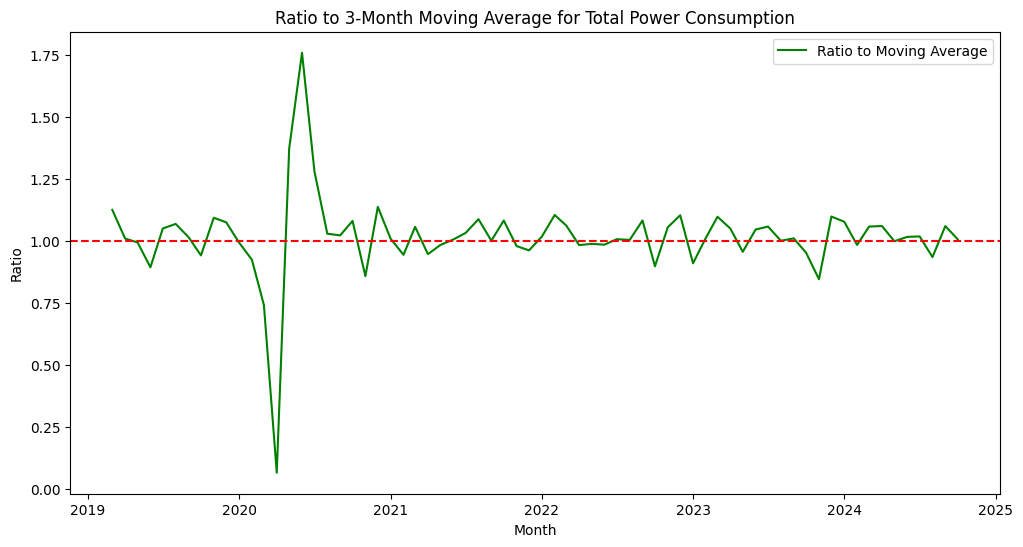

In [ ]:
data['Ratio_to_Moving_Avg'] = data['Total Power Consumption (KWH)'] / data['SMA_3']

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ratio_to_Moving_Avg'], label='Ratio to Moving Average', color='green')
plt.axhline(y=1, color='red', linestyle='--')  # Reference line at 1
plt.title('Ratio to 3-Month Moving Average for Total Power Consumption')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.legend()
plt.show()

## 3. ARIMA Modeling

**Check for Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):

    dftest = adfuller(dataset.dropna(), autolag='AIC')

    print("1. ADF Statistic:", dftest[0])
    print("2. P-Value:", dftest[1])
    print("3. Num Of Lags:", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])

    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print(f"\t{key}: {val}")

ad_test(data['Total Power Consumption (KWH)'])

1. ADF Statistic: 0.5694036814708064
2. P-Value: 0.9868366941159945
3. Num Of Lags: 8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 61
5. Critical Values:
	1%: -3.542412746661615
	5%: -2.910236235808284
	10%: -2.5927445767266866


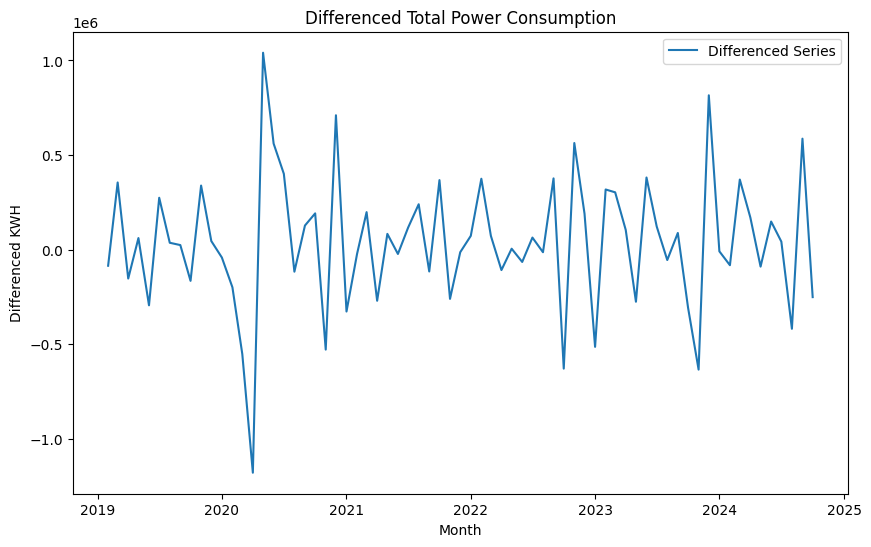

In [ ]:
# Differencing the data to achieve stationarity
data['Differenced'] = data['Total Power Consumption (KWH)'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Differenced'], label='Differenced Series')
plt.title('Differenced Total Power Consumption')
plt.xlabel('Month')
plt.ylabel('Differenced KWH')
plt.legend()
plt.show()

**ARIMA Model**

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.8 MB/s eta 0:00:00


**Train-Test split**

In [ ]:
train = data.iloc[:-14]
test = data.iloc[-14:]

print("Train set shape:", train.shape)
print("Test set shape:", test.shape)

Train set shape: (56, 14)
Test set shape: (14, 14)


**Fitting model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example of adding seasonality with a yearly period (s=12 for monthly data with annual seasonality)
model = SARIMAX(train['Total Power Consumption (KWH)'],
                order=(1, 1, 5),  # Update (p, d, q) based on AIC
                seasonal_order=(1, 1, 1, 12))  # Seasonal order for annual seasonality
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:        Total Power Consumption (KWH)   No. Observations:                   56
Model:             SARIMAX(1, 1, 5)x(1, 1, [1], 12)   Log Likelihood                -616.443
Date:                              Tue, 12 Nov 2024   AIC                           1250.886
Time:                                      03:47:10   BIC                           1266.737
Sample:                                  01-01-2019   HQIC                          1256.731
                                       - 08-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4680      1.098      0.426      0.670      -1.684       2.620
ma.L1         -0.81

**Testing model**

2023-09-01    3.853357e+06
2023-10-01    3.716093e+06
2023-11-01    3.770812e+06
2023-12-01    3.937449e+06
2024-01-01    3.993133e+06
2024-02-01    4.081518e+06
2024-03-01    4.168273e+06
2024-04-01    3.944283e+06
2024-05-01    4.048989e+06
2024-06-01    4.172082e+06
2024-07-01    4.329188e+06
2024-08-01    4.338496e+06
2024-09-01    4.433016e+06
2024-10-01    4.360752e+06
Freq: MS, Name: predicted_mean, dtype: float64


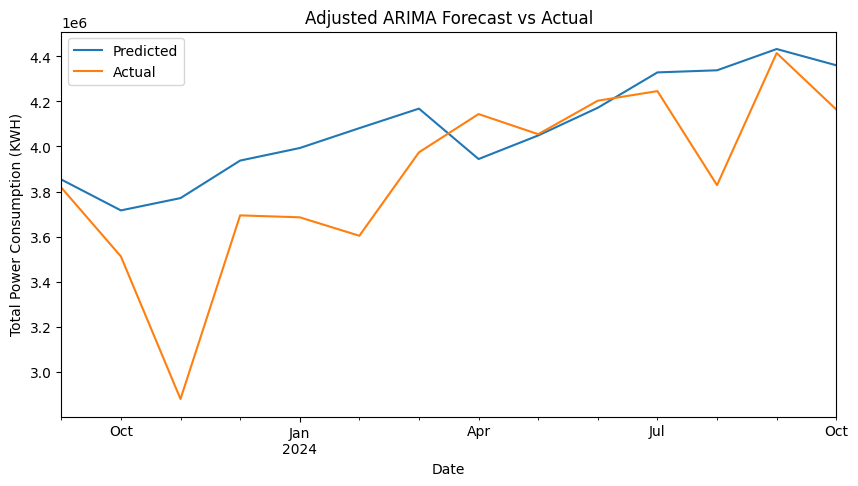

In [ ]:
# Define start and end of forecast period
start = len(train)
end = len(train) + len(test) - 1

# Predict on the test set with the updated model
pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)

# Plot the predictions and the actual data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
pred.plot(legend=True, label='Predicted')
test['Total Power Consumption (KWH)'].plot(legend=True, label='Actual')
plt.title('Adjusted ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Power Consumption (KWH)')
plt.legend()
plt.show()


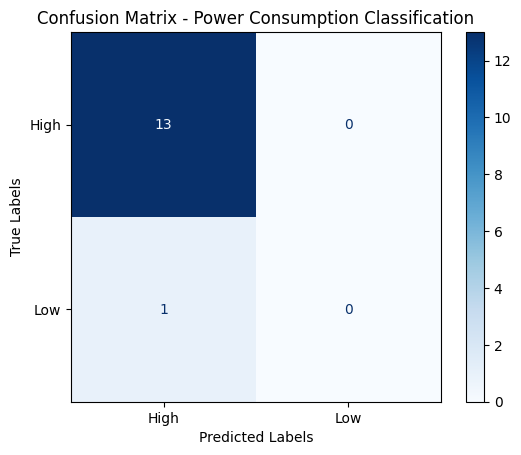

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define threshold to classify power consumption (you can adjust this value)
threshold = 3_000_000  # Adjust based on your data

# Convert actual and predicted values into binary classification (High/Low Consumption)
test_class = np.where(test['Total Power Consumption (KWH)'] > threshold, 'High', 'Low')
pred_class = np.where(pred > threshold, 'High', 'Low')

# Generate the confusion matrix
cm = confusion_matrix(test_class, pred_class, labels=['High', 'Low'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High', 'Low'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Power Consumption Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(pred, test['Total Power Consumption (KWH)']))
print("RMSE:", rmse)

RMSE: 338813.6441664139


**Forcasting**

In [ ]:
forecast_month = input("Enter the month (e.g., 'Nov'): ")
forecast_year = input("Enter the year (e.g., '2025'): ")
forecast_date_str = f"{forecast_year}-{forecast_month}-01"

In [ ]:
# Generate future dates from the last date in the dataset to the user-specified date
last_date = pd.to_datetime(data.index[-1])  # Assuming data index is datetime
forecast_date = pd.to_datetime(forecast_date_str)

In [ ]:
# Calculate the number of months between the last date and the user-specified forecast date
months_ahead = (forecast_date.year - last_date.year) * 12 + (forecast_date.month - last_date.month)

In [ ]:
# Make the forecast if the user input date is in the future
if months_ahead > 0:
    # Generate prediction for the user-specified month
    future_pred = model_fit.predict(start=len(data), end=len(data) + months_ahead - 1, typ='levels')
    print(f"Predicted power consumption for {forecast_month} {forecast_year}: {future_pred.iloc[-1]} KWH")
else:
    print("Please enter a future date for forecasting.")


Predicted power consumption for nov 2025: 5015656.35031776 KWH


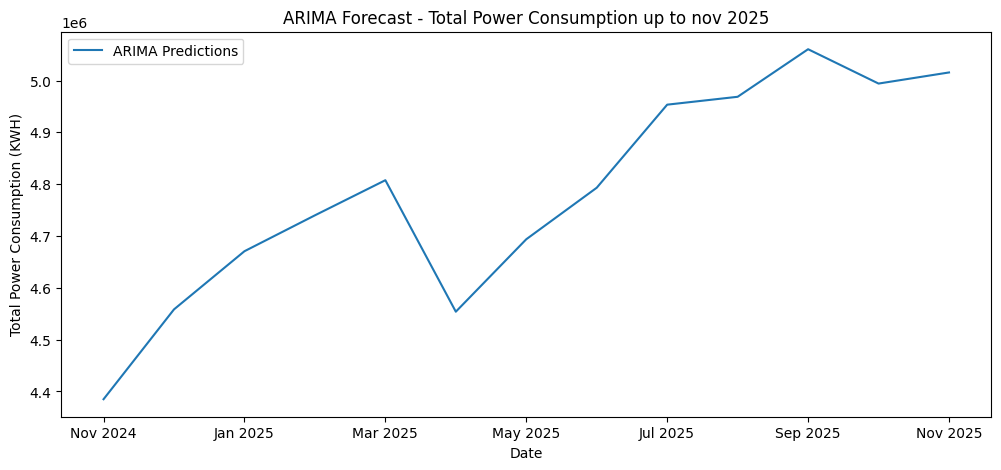

In [ ]:
# Plot forecast results
index_future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_ahead, freq='MS').strftime('%b %Y')
future_pred.index = index_future_dates
future_pred.plot(figsize=(12, 5), legend=True, label='ARIMA Predictions')
# Add labels and title for clarity
plt.title(f'ARIMA Forecast - Total Power Consumption up to {forecast_month} {forecast_year}')
plt.xlabel('Date')
plt.ylabel('Total Power Consumption (KWH)')
plt.legend()
plt.show()

## fixed 6 months prediction

In [ ]:
# Generate future dates from November 2024 to May 2025
index_future_dates = pd.date_range(start="2024-11-01", end="2025-05-31", freq='MS').strftime('%b %Y')
print(index_future_dates)

# Generate predictions for the future period (adjust end to match the number of months)
pred = model_fit.predict(start=len(data), end=len(data) + len(index_future_dates) - 1, typ='levels').rename('ARIMA Predictions')
print(pred)

# Set the index of predictions to the future dates in the "Month Year" format
pred.index = index_future_dates
print(pred)

Index(['Nov 2024', 'Dec 2024', 'Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025',
       'May 2025'],
      dtype='object')
2024-11-01    4.384989e+06
2024-12-01    4.558393e+06
2025-01-01    4.670646e+06
2025-02-01    4.739899e+06
2025-03-01    4.807696e+06
2025-04-01    4.553925e+06
2025-05-01    4.693736e+06
Freq: MS, Name: ARIMA Predictions, dtype: float64
Nov 2024    4.384989e+06
Dec 2024    4.558393e+06
Jan 2025    4.670646e+06
Feb 2025    4.739899e+06
Mar 2025    4.807696e+06
Apr 2025    4.553925e+06
May 2025    4.693736e+06
Name: ARIMA Predictions, dtype: float64


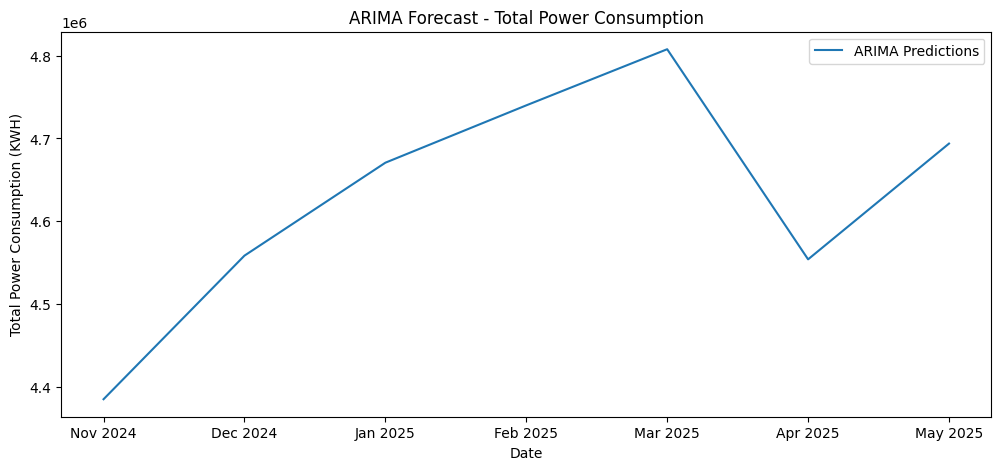

In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions
pred.plot(figsize=(12, 5), legend=True, label='ARIMA Predictions')

# Add labels and title for clarity
plt.title('ARIMA Forecast - Total Power Consumption')
plt.xlabel('Date')
plt.ylabel('Total Power Consumption (KWH)')
plt.legend()
plt.show()

## contract Demand

                                     SARIMAX Results                                      
Dep. Variable:               Contract Demand(KVA)   No. Observations:                   56
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -216.297
Date:                            Tue, 12 Nov 2024   AIC                            442.594
Time:                                    03:47:30   BIC                            449.431
Sample:                                01-01-2019   HQIC                           444.736
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0095    719.328  -1.32e-05      1.000   -1409.866    1409.847
ma.L1          0.0099    757.767   

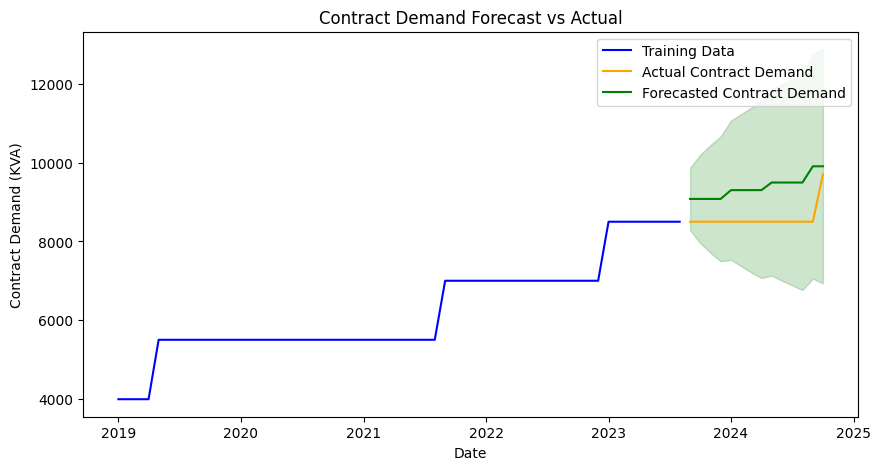

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data['Contract Demand(KVA)'][:train_size], data['Contract Demand(KVA)'][train_size:]

# Fit a SARIMA model to the training data
# Initial choice of parameters can be adjusted based on AIC optimization
model = SARIMAX(train,
                order=(1, 1, 1),          # Non-seasonal order (p, d, q)
                seasonal_order=(1, 1, 1, 12),  # Seasonal order (P, D, Q, s) with annual seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit(disp=False)
print(model_fit.summary())

# Forecast the test set period
forecast = model_fit.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Plot the forecast vs actual values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Contract Demand', color='orange')
plt.plot(test.index, forecast.predicted_mean, label='Forecasted Contract Demand', color='green')

# Add confidence intervals
plt.fill_between(test.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='green', alpha=0.2)

plt.title('Contract Demand Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Contract Demand (KVA)')
plt.legend()
plt.show()


Enter the target year for forecasting (e.g., 2025): 2025
Enter the target month for forecasting (e.g., 'March'): march
                                     SARIMAX Results                                      
Dep. Variable:               Contract Demand(KVA)   No. Observations:                   56
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -216.297
Date:                            Tue, 12 Nov 2024   AIC                            442.594
Time:                                    03:47:49   BIC                            449.431
Sample:                                01-01-2019   HQIC                           444.736
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

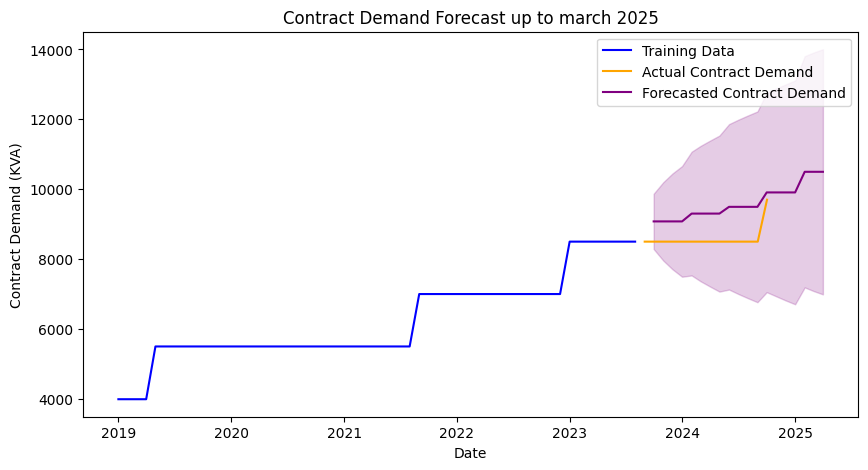

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data['Contract Demand(KVA)'][:train_size], data['Contract Demand(KVA)'][train_size:]

# Take user input for target year and month for the forecast
target_year = int(input("Enter the target year for forecasting (e.g., 2025): "))
target_month = input("Enter the target month for forecasting (e.g., 'March'): ")

# Convert month name to a number
months = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
target_month_num = months[target_month.capitalize()]

# Calculate the number of forecast steps required
last_date = train.index[-1]
target_date = pd.to_datetime(f"{target_year}-{target_month_num}-01")
forecast_steps = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Model parameters
p, d, q = 1, 1, 1  # You may adjust these or get from the user if needed
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters for yearly seasonality

# Fit a SARIMA model to the training data
model = SARIMAX(train,
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit(disp=False)
print(model_fit.summary())

# Forecast up to the user-defined date
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast vs actual values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Contract Demand', color='orange')

# Add forecasted future demand up to the target date
forecast_index = pd.date_range(start=last_date + relativedelta(months=1), periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Contract Demand', color='purple')

# Add confidence intervals
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='purple', alpha=0.2)

plt.title(f'Contract Demand Forecast up to {target_month} {target_year}')
plt.xlabel('Date')
plt.ylabel('Contract Demand (KVA)')
plt.legend()
plt.show()
